In [6]:
import numpy as np
import matplotlib.pyplot as plt


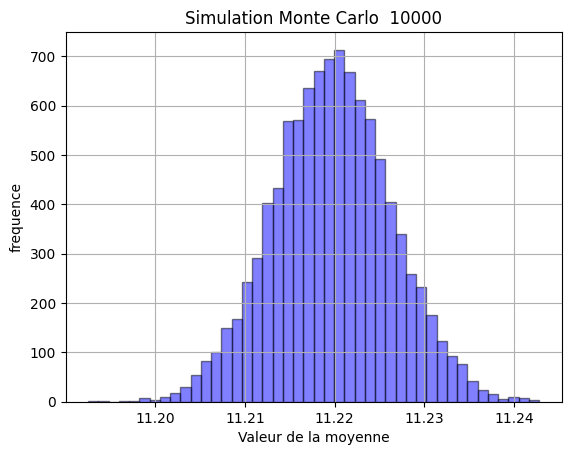

mean: 11.220
incertitude de la moyenne:  u = 0.007


In [7]:
B = np.array([
        0.6, 3.5, 7.7, 13.8, 17.1, 16.9, 15.2, 15.5, 17.1, 18.3, 17, 15.7, 17, 19, 18.9, 13.9, 8.2, 3.9, 1.8,
        0.6, 3.6, 8.5, 14.2, 17.7, 17.6, 16, 17, 18.8, 19.6, 18.1, 16.5, 17.3, 19, 18.1, 12.4, 7.4, 3.7, 1,
        0.2, 1.8, 4.8, 8.8, 11.1, 10.8, 9.6, 9.5, 10.3, 10.6, 10, 9.4, 10, 11.2, 11, 8.5, 4.5, 2.1, 0.6,
        0.8, 3.4, 8.1, 13.3, 15.8, 15.5, 14.1, 15, 17, 17.5, 15.9, 14.5, 15.6, 16.8, 16, 11.2, 5.9, 2.6, 0.7
    ])
u = 0.1 # insertitude du teslametre (mT)

# simulation monte carlo
N = 10000 # nombre de tirages
np.random.seed(78763986)
mean = np.mean(B)
Moyennes = np.zeros(N)
for i in range(N):
    # generation d'une carte de champs aléatoires
    x = np.random.uniform(-u, +u, size=len(B))
    # print(B+x)
    # calcul de la moyenne
    Moyennes[i] = np.mean(B + x)
    # plot histograme
plt.hist(Moyennes,bins="rice", alpha=0.5, color='blue', edgecolor='black')
plt.title(f"Simulation Monte Carlo  {i+1}")
plt.xlabel("Valeur de la moyenne")
plt.ylabel("frequence")
plt.grid()
plt.show()


print(f"mean: {mean:.3f}")
print(f"incertitude de la moyenne:  u = {np.std(Moyennes):.3f}")

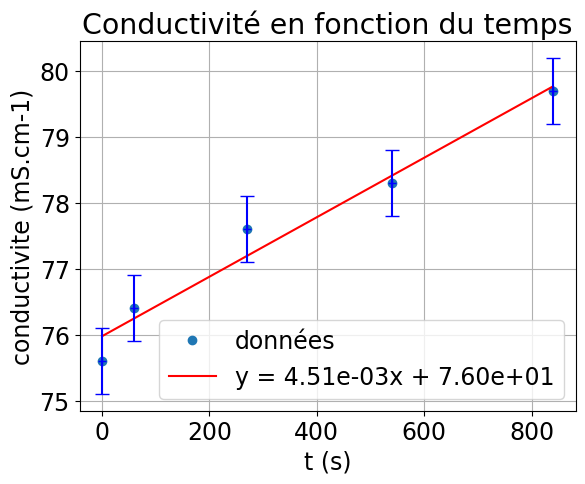

In [8]:
cond = np.array([75.6, 76.4, 77.6, 78.3, 79.7]) #mS.cm-1
T = np.array([0, 60, 270, 540, 14*60])
plt.rcParams.update({'font.size': 17})


a, b  = np.polyfit(T, cond, 1)
plt.plot(T, cond, 'o', label='data')
plt.plot(T, a*T + b, 'r', label='fit')
plt.xlabel('t (s)')
plt.ylabel('conductivite (mS.cm-1)')
plt.title('Conductivité en fonction du temps')
plt.errorbar(T, cond, yerr=0.5, fmt='+', color='blue', capsize=5, label='erreur')
plt.grid()
plt.legend(['données', f'y = {a:.2e}x + {b:.2e}'])

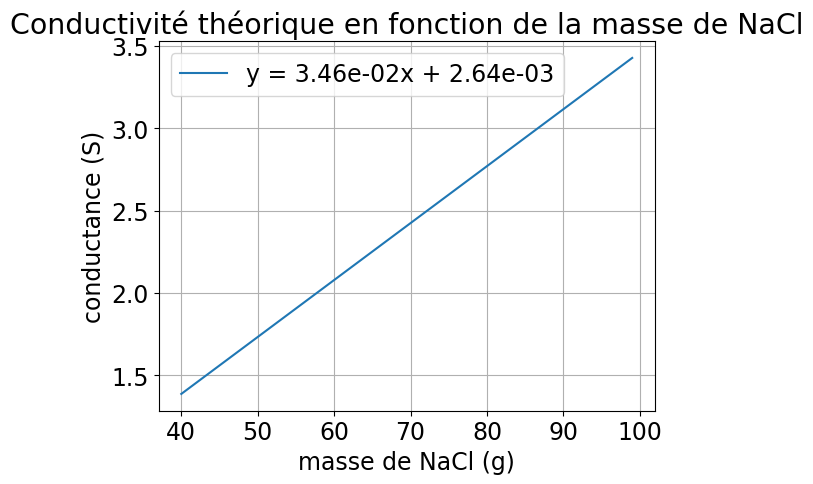

In [20]:
#conductivité eau de paris
cond_eau_paris = 5.49e-2 # S.m-1
S = 9e-2*8e-3 #m2
e = 1.5e-2 # m
X = []
Y = []
for m in range(40, 100):
    M = 58.44 # g.mol-1  masse molaire du chlorure de sodium
    V = 300e-6 # m3 volume de la solution
    C = (m / M) / V  # mol.m-3 concentration de la solution 
    Cond_Na = 5.008e-3 #S.m^2.mol^-1
    Cond_Cl = 7.631e-3 #S.m2.mol^-1       (S = omh-1)
    Cond = C * (Cond_Na + Cond_Cl) # S.m-1 conductivité de la solution
    X.append(m)
    Y.append(Cond *S/e + cond_eau_paris*S/e) # correction de la conductivité de l'eau de paris
a, b = np.polyfit(X, Y, 1)
plt.plot(X, Y, label='conductivité théorique')
plt.legend([f'y = {a:.2e}x + {b:.2e}'])
plt.title('Conductivité théorique en fonction de la masse de NaCl')
plt.xlabel('masse de NaCl (g)')
plt.ylabel('conductance (S)')
plt.grid()
plt.show()

